# Housing Price Prediction Model

# 1. Importing Files

In [1]:
# Libraries to explore data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Regression Libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor

In [2]:
# load dataset
housing = pd.read_csv('housing.csv')

In [3]:
# show dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


# 2. EDA

In [4]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [5]:
# check missing values
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

### Dealing with Missing values

In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
# checking number of rows having null total_bedrooms per categorical features
nuldf = housing[housing['total_bedrooms'].isnull()]
nuldf
nuldf['ocean_proximity'].value_counts()

<1H OCEAN     102
INLAND         55
NEAR OCEAN     30
NEAR BAY       20
Name: ocean_proximity, dtype: int64

###### As there are no null values in Island Category, we can safely drop it otherwise we could not have
###### dropped it as their are only 5 rows in island category, dropping them could have removed the category
###### itself in that case (in case some or all the island had null values in total_bedrooms)

In [8]:
housing_2 = housing.dropna()

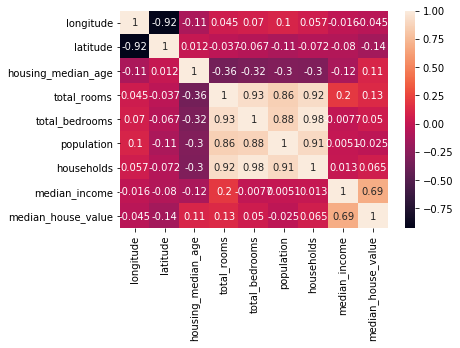

In [9]:
sns.heatmap(data=housing_2.corr(),annot=True)

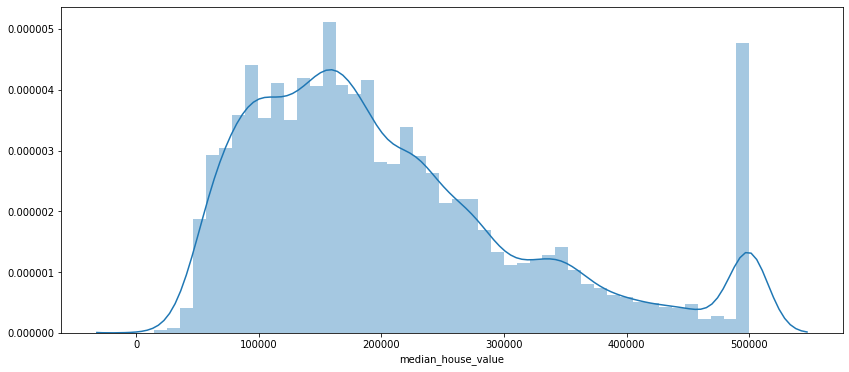

In [10]:
plt.figure(figsize=(14,6))
sns.distplot(housing_2['median_house_value'])
plt.show()

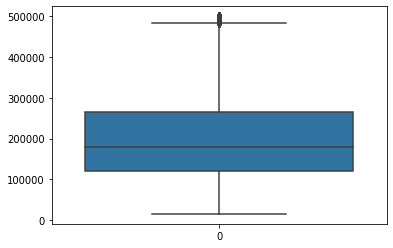

In [11]:
sns.boxplot(data=housing_2['median_house_value'])

In [12]:
# frequencies of >500000 could be outliers
# let's check how many values are above 500000
housing_2[housing_2['median_house_value']>=500000]['median_house_value'].value_counts().head()

500001    958
500000     27
Name: median_house_value, dtype: int64

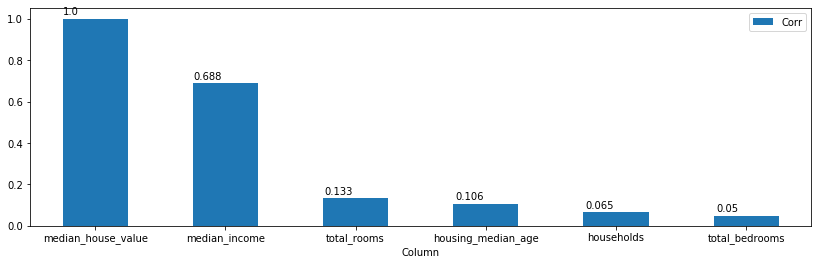

In [13]:
# Correlation of columns with median_house_value

corr_matrix1 = housing_2.corr()
corr = corr_matrix1.median_house_value.sort_values(ascending=False)
d = pd.DataFrame({'Column':corr.index,
                 'Corr':corr.values})
d1 = d[d['Corr'].values>0]

ax = d1.plot.bar(x='Column',rot=0,figsize=(14,4))
for p in ax.patches:
    ax.annotate(str(round((p.get_height()),3)), (p.get_x() * 1.005, p.get_height() + 0.02))

### Let's check how median_house_value has effect on latitude and longitude

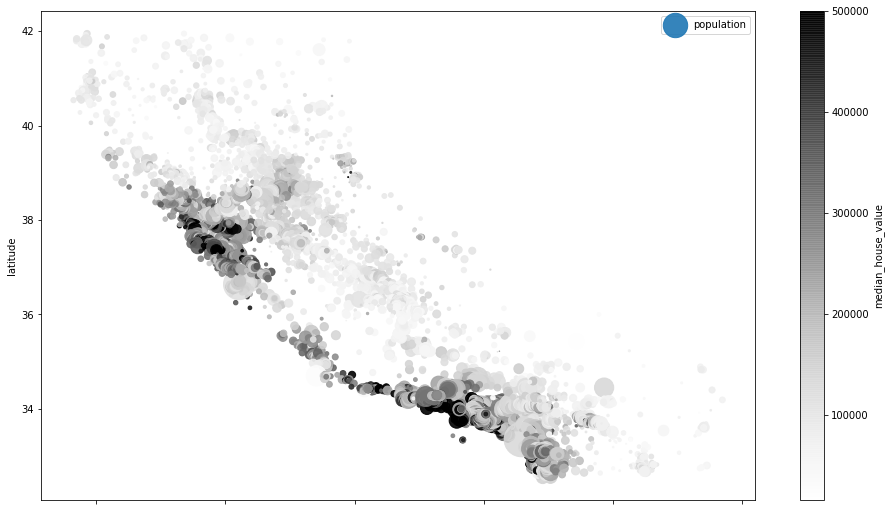

In [14]:
housing_2.plot(kind='scatter', x='longitude', y='latitude', alpha=0.9,
             s=housing_2['population']/30, label='population', figsize=(16,9),
             c='median_house_value', colorbar=True)

### Dealing With Categorical Data

In [15]:
housing_hot = pd.concat([housing_2,pd.get_dummies(housing_2['ocean_proximity'])],axis=1)

# now drop the original 'ocean_proximity' column
housing_hot.drop(['ocean_proximity'],axis=1, inplace=True)

In [16]:
housing_hot.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


# 3. Model

In [17]:
x = housing_hot.drop('median_house_value', axis = 1)
y = housing_hot['median_house_value']

In [18]:
# splitting dataset into train & test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Standardize Data

In [19]:
std = StandardScaler()

In [20]:
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

### Linear Regression

In [21]:
linear_reg = LinearRegression()
linear_reg.fit(x_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
linreg_score = linear_reg.score(x_test_std,y_test)
linreg_score

0.6487925839622717

In [23]:
y_predict = linear_reg.predict(x_test_std)

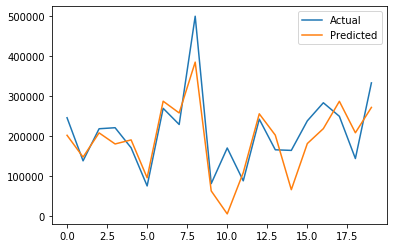

In [24]:
pd.DataFrame({'Actual': y_test[:20].array, 'Predicted': y_predict[:20].flatten()}).plot()

### RandomForestRegressor

In [25]:
rfr = RandomForestRegressor()

In [26]:
rfr.fit(x_train_std,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
rfr_score = rfr.score(x_test_std,y_test)
rfr_score

0.8254785166476761

In [28]:
y_predict = rfr.predict(x_test_std)

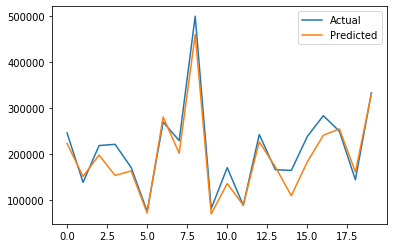

In [29]:
pd.DataFrame({'Actual': y_test[:20].array, 'Predicted': y_predict[:20].flatten()}).plot()

### Decision Tree

In [30]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_std,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [31]:
dtr_score = dtr.score(x_test_std,y_test)
dtr_score

0.6616414792173796

In [32]:
y_predict = dtr.predict(x_test_std)

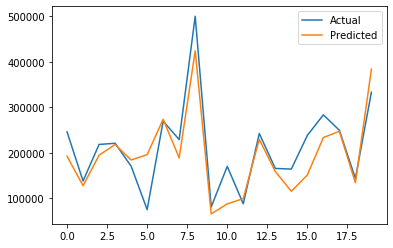

In [33]:
pd.DataFrame({'Actual': y_test[:20].array, 'Predicted': y_predict[:20].flatten()}).plot()

# 4. Scores

In [34]:
accuracy = []
models = ['Linear Regression','Random Forest','Decision Tree']
scores = [linreg_score,rfr_score,dtr_score]
for s in scores:
    accuracy.append(round(s*100,2))

In [35]:
score_df = pd.DataFrame({'models' : models,'accuracy' : accuracy})

In [36]:
score_df

,models,accuracy
0,Linear Regression,64.88
1,Random Forest,82.55
2,Decision Tree,66.16


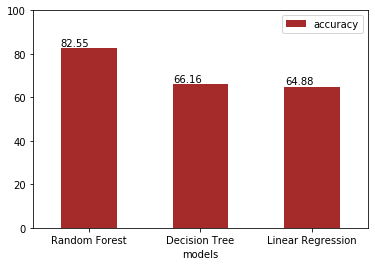

In [37]:
score_plot = score_df.sort_values('accuracy',ascending=False).plot.bar(x='models',rot=0,color=['brown'])
score_plot.set_yticks(range(0,101,20))
for p in score_plot.patches:
    score_plot.annotate(str(round((p.get_height()),3)), (p.get_x() * 1.005, p.get_height() + 1))